<a href="https://colab.research.google.com/github/azizeko29/new_deteksi_fraud/blob/master/%5Bnew_RUS%5D_ULB_pemodelan_ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import collections
import time
from scipy import stats

In [0]:
# %matplotlib inline
# from IPython.display import display
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statistics import stdev

from sklearn import tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

In [0]:
# np.random.seed(1)

In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
    correct = 0
    #for each actual label
    for i in range(len(actual)):
        #if actual matches predicted label
        if actual[i] == predicted[i]:
            #add 1 to the correct iterator
            correct += 1
    #return percentage of predictions that were correct
    return correct / float(len(actual)) * 100.0

In [0]:
# confussion_matrik(y,pred)

In [0]:
# accuracy,sensitivity,specifity = acc_sens_spec(y,pred)
# print('acc',accuracy)
# print('sens',sensitivity)
# print('spec',specifity)

In [0]:
# accuracy_metric(y,RF.predict(X))

In [0]:
def cross_val_split(X,fold=2,seed=0):
    np.random.seed(seed)
    n_folds= fold
    size = X.shape[0]/n_folds
    X_idx = list(range(X.shape[0]))
    folds_data= []
    for i in range(n_folds):
#         print(X_idx)
        random_idx = list(np.random.choice(X_idx,int(size),replace=False))
#         print(random_idx)
        X_idx = [idx for idx in X_idx if idx not in random_idx]
#         print(X_idx)

        folds_data.append(random_idx)
#         print("--")
    return folds_data

def kfold_cross_validation(model,X,y, n_fold=2, n_seed=0):
    folds = cross_val_split(X,fold=n_fold,seed=n_seed)
    fold_result =[]
    for i in range(len(folds)):
    #     print(i)
        train = []
        for j in range(len(folds)):
            if j != i:
                train = train + folds[j]
        test = folds[i]

        X_train = X.iloc[train,:].reset_index(drop=True)
        y_train = y[train].reset_index(drop=True)

        X_test = X.iloc[test,:].reset_index(drop=True)
        y_test = y[test].reset_index(drop=True)


        t0 = time.time()
        model.fit(X_train, y_train)
        t1 = time.time()
        waktu = t1 - t0

        predict = model.predict(X_test)
        accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

        result = [accuracy,sensitivity,specifity,precision,recall,f1_score,waktu]
        fold_result.append(result)
        
    return fold_result

In [0]:
def testing(model,X_test,y_test):
    result_ = []

#       t0 = time.time()
#       model.fit(X_train, y_train)
#       t1 = time.time()
#       waktu = t1 - t0
    predict = model.predict(X_test)
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

    result = [accuracy,sensitivity,specifity,precision,recall,f1_score]
        
    result_.append(result)
        
    return result_

In [0]:
# from sklearn.decomposition import PCA
# import pylab as pl
# def plot_this(X_rs,y_rs,method):
#   # Use principal component to condense the 10 features to 2 features
#   pca = PCA(n_components=2).fit(X_rs)
#   pca_2d = pca.transform(X_rs)
#   # Assign colors
#   for i in range(0, pca_2d.shape[0]):
#     if y_rs[i] == 0:
#       c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
#     elif y_rs[i] == 1:
#       c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
#   pl.legend([c1, c2], ['Class 1', 'Class 2'])
#   pl.title(method)
#   pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
#   pl.show()
    


## ---------

In [0]:
# ##read data

# df = pd.read_csv('data/creditcard_ulb.csv',sep=",")
# # df = pd.read_csv('data/sample_data.csv',sep=",")

# df0 = df.copy()
# df.info()

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# ##read data

read_df = pd.read_csv('drive/My Drive/Deteksi fraud/data/creditcard_ulb.csv',sep=",")
# # df = pd.read_csv('data/sample_data.csv',sep=",")

# df0 = df.copy()
# df.info()

In [0]:
# # Code to read csv file into Colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# link = 'https://drive.google.com/open?id=1PqCaaZwbyxrFdhLLPFB0TM9Z4jcP7LPo' # The shareable link

# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='

# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('creditcard_ulb.csv')  
# read_df = pd.read_csv('creditcard_ulb.csv')
# # Dataset is now stored in a Pandas Dataframe
# # df.info()

In [0]:
df = read_df.copy()

In [26]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [28]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

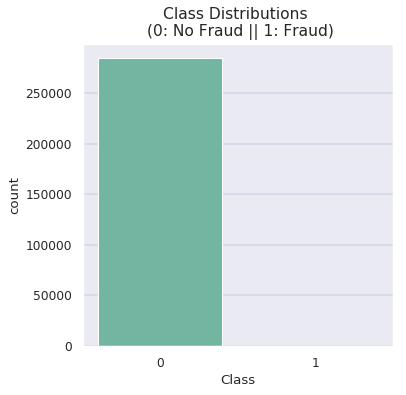

In [29]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df,palette='Set2')


In [30]:
count = 0
for a in df.columns[1:]:
    if df[a].isnull().sum() > 0 :
#         print(a)
        count+=1
count

0

In [31]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

In [34]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
67718,52669.0,-1.044875,-0.699877,2.383771,0.462870,-0.523350,-0.484606,-0.782931,0.160622,-1.059381,0.666156,-0.591895,0.378854,2.008465,-0.634986,1.418612,-1.196899,-0.341566,2.081873,-0.795839,0.267347,0.102301,0.625710,0.285710,0.390592,-0.443462,-0.238541,0.448415,0.273184,90.00
99134,66981.0,-0.105756,1.055263,0.219036,0.972113,0.544316,-1.205159,0.996226,-0.342528,-0.555430,0.305929,-0.402451,0.358783,0.727030,0.308077,0.605273,-0.596082,-0.201596,-0.212436,0.397815,0.061089,0.149714,0.680987,0.163366,0.412736,-0.658454,-0.424248,0.326754,0.220772,2.69
255988,157487.0,2.273034,-0.620167,-1.579732,-1.038778,-0.195400,-1.021584,-0.241990,-0.453477,-0.649705,0.849121,-1.056267,-0.269228,1.409078,-0.228375,0.256648,1.030782,-0.164283,-1.212026,0.675735,0.059748,0.400569,1.235467,-0.112693,-0.563243,0.332715,0.105684,-0.032988,-0.070058,15.00
121848,76343.0,-0.868089,-0.127889,1.473924,-1.124669,-1.904013,1.163006,-0.283742,0.746531,-0.736264,-0.175059,0.401805,-0.213943,-0.774657,-0.389873,-1.238179,0.851705,0.798677,-1.065141,1.117206,-0.052033,0.176907,0.469763,0.029259,-0.303608,-0.126885,-0.257276,-0.073542,-0.063614,189.90
274029,165822.0,-1.240829,-0.395491,1.958589,-0.047792,0.597116,-0.861073,-0.174849,0.156320,0.198213,-0.808267,-0.964026,-0.429859,-0.809422,0.190108,1.242464,-0.312181,0.034655,0.026180,1.173892,0.349427,-0.141820,-0.729206,0.066061,-0.130264,0.157839,-0.011302,0.015111,0.093282,39.95


In [35]:
y_train.shape

(199364,)

In [36]:
y_test.shape

(85443,)

In [37]:
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [38]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [0]:
df_train = X_train.copy()
df_train['Class'] = y_train.copy()
df_train.to_csv('drive/My Drive/Deteksi fraud/data/ULB_preprocessing_train.csv',sep=';',index=False)

In [0]:
df_test = X_test.copy()
df_test['Class'] = y_test.copy()
df_test.to_csv('drive/My Drive/Deteksi fraud/data/ULB_preprocessing_test.csv',sep=';',index=False)

In [0]:
# # Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# # df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# # df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df['scaled_amount'] = minmax_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = minmax_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df.drop(['Time','Amount'], axis=1, inplace=True)

# scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

# df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
# df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

# # Amount and Time are Scaled!

# df.head()

In [42]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df_copy = df_train.copy()
# df_copy = df_copy.sample(frac=1)

fraud_df = df_copy.loc[df_copy['Class'] == 1]
# non_fraud_df = df_copy.loc[df['Class'] == 0][:344]
non_fraud_df = df_copy.loc[df_copy['Class'] == 0].sample(n=344,random_state=1)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=1)
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,139767.0,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,-5.416037,4.497929,-5.019610,-1.019691,-7.914989,0.669648,-4.472014,-5.856998,-2.243178,-0.173814,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.54,1
1,70536.0,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,-1.092921,-5.032028,3.510348,-2.227398,0.656824,-5.199186,-0.128311,-3.943521,-3.820522,-0.570821,2.783383,2.285758,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,824.83,1
2,130349.0,1.764965,-0.640638,-0.452079,0.121273,0.242557,1.935698,-1.005408,0.671404,1.133422,-0.203693,1.474416,1.725986,0.542809,-0.005425,0.827996,-0.928667,0.309578,-1.213858,-1.379076,-0.299957,0.351390,1.411035,0.187029,-1.643892,-0.381872,-0.086202,0.112130,-0.063010,11.50,0
3,51155.0,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,-2.336584,-5.927359,2.470401,-5.788517,-0.391939,-6.527462,0.899859,-3.847293,-6.700637,-2.492616,0.469554,0.860912,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,99.99,1
4,78668.0,1.237688,0.360344,-0.287389,0.865929,0.496825,-0.187566,0.404371,-0.101166,-0.154733,-0.046287,-0.840872,0.021235,-0.071557,0.558838,1.070609,-0.097905,-0.350690,-0.829990,-0.141321,-0.131606,-0.373471,-1.101931,0.023660,-0.829145,0.492318,-0.614306,0.011220,0.012320,21.37,0


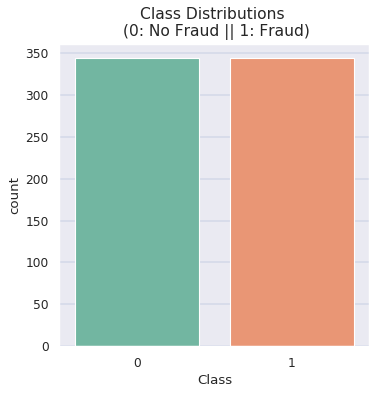

In [43]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df_new,palette='Set2')

In [0]:
# X = df.drop('Class', axis=1)
# y = df['Class'].copy()

In [0]:
X_new = df_new.drop('Class', axis=1)
y_new = df_new['Class'].copy()

In [46]:
y_new.value_counts()

1    344
0    344
Name: Class, dtype: int64

In [47]:
X_new.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

## K-folds


In [0]:
def validasi_model (clf,X,y,kfolds):
    CV_SKLearn = kfold_cross_validation(clf,X,y,n_fold=kfolds,n_seed=1)
    df_result = pd.DataFrame(data= CV_SKLearn, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score','Waktu'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

    df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [0]:
# Classifier Libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

    
clf_RF = RandomForestClassifier(random_state=1,n_estimators=10)
clf_AB = AdaBoostClassifier(random_state=1,n_estimators=100)
clf_B = BaggingClassifier(random_state=1,n_estimators=100)
clf_ET = ExtraTreesClassifier(random_state=1,n_estimators=100)
clf_GB = GradientBoostingClassifier(random_state=1,n_estimators=50)

##skenario 
skenario_1 = {}
skenario_1['1'] = clf_RF
# skenario_1['2'] = clf_AB
# skenario_1['3'] = clf_B
# skenario_1['4'] = clf_ET
skenario_1['5'] = clf_GB


In [50]:
for i in skenario_1:
    
    clf_skenario = skenario_1[i]
#     print('komposisi', i)

    
    result_SKLearn = validasi_model(clf_skenario,X_new,y_new,5)
#     print(result_SKLearn)
    
    nama_file = 'drive/My Drive/Deteksi fraud/hasil/RUS/ULB/k_folds/komposisi999.csv'
    nama_file = nama_file.replace('999',str(i))

    result_SKLearn.to_csv(nama_file, sep=';',index=False)
                

df_result = pd.DataFrame()
for i in skenario_1:
    nama_file = 'drive/My Drive/Deteksi fraud/hasil/RUS/ULB/k_folds/komposisi999.csv'
    nama_file = nama_file.replace('999',str(i))
    df_komposisi = pd.read_csv(nama_file,sep=";")
    df_result = df_result.append(df_komposisi.iloc[5:,:])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name

df_result.to_csv('drive/My Drive/Deteksi fraud/hasil/RUS/ULB/k_folds/result.csv', sep=';',index=False)
df_result      


,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
0,0.925547,0.882868,0.968245,0.965915,0.882868,0.921084,0.065912
1,0.918248,0.894878,0.941989,0.940859,0.894878,0.915622,0.118207


-----

## Testing

In [0]:
def validasi_testing (clf,X,y):
    testing_result = testing(clf,X,y)
    df_result = pd.DataFrame(data= testing_result, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

#     df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [52]:
from sklearn.ensemble import RandomForestClassifier
n_tree = 100
# clf_RF_ = RandomForestClassifier(random_state=1,n_estimators=n_tree, max_features='sqrt')
clf_RF.fit(X_new,y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
n_tree = 100
# clf = RandomForestClassifier(random_state=1,n_estimators=n_tree, max_features='sqrt')
# clf_GB = GradientBoostingClassifier(random_state=1,n_estimators=50)

clf_GB.fit(X_new,y_new)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
result = {}
for i in skenario_1:
  
    clf_skenario = skenario_1[i]
    result[i] = validasi_testing(clf_skenario,X_test,y_test)
    
                
df_result = pd.DataFrame()
for i in skenario_1:
    df_result = df_result.append(result[i])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name



nama_file = 'drive/My Drive/Deteksi fraud/hasil/RUS/ULB/testing/result.csv'

df_result.to_csv(nama_file, sep=';',index=False)

df_result

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score
0,0.972613,0.925676,0.972695,0.055556,0.925676,0.104820
1,0.955900,0.932432,0.955941,0.035421,0.932432,0.068249


----

**testing balance data**

In [55]:
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [0]:
df_test = X_test.copy()
df_test['Class'] = y_test.copy()

In [57]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df_copy = df_test.copy()
# df_copy = df_copy.sample(frac=1)

fraud_df = df_copy.loc[df_copy['Class'] == 1]
non_fraud_df = df_copy.loc[df_copy['Class'] == 0].sample(n=148,random_state=1)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=1)
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,162903.0,-0.390568,0.270001,1.085434,-0.464380,-0.279046,-0.507906,0.218688,-0.041113,0.762716,-0.446903,-1.363403,-0.449710,-0.733004,-0.280190,0.000988,0.329930,-0.570067,0.240442,-0.386314,-0.320266,0.253206,0.876503,-0.017118,0.016664,-0.422901,0.539258,-0.163523,0.026458,25.89,0
1,129955.0,1.884704,0.535843,-1.116821,3.498523,1.050070,0.480142,0.395467,-0.080441,-1.180259,1.412192,-1.530856,-0.049783,0.895820,0.191061,-0.510240,1.050241,-1.090546,-0.668929,-1.233169,-0.096197,-0.268442,-0.925170,0.271971,-0.042794,-0.184396,-0.358618,-0.048632,-0.032508,56.71,0
2,159203.0,2.230196,-1.351494,-1.011452,-1.668003,-1.011959,-0.351587,-1.053100,-0.130973,-1.650390,1.708163,0.869462,0.365784,1.240951,-0.381091,-0.980562,-0.459717,0.212848,0.254881,0.142991,-0.311319,-0.098906,0.173737,0.230330,0.772078,-0.159950,-0.221738,0.002684,-0.048924,33.39,0
3,139279.0,-1.652409,-2.815875,2.317561,-1.209682,0.890838,-0.635322,-1.924706,0.409848,0.421943,0.193755,-0.321328,-0.406484,-1.057505,-1.121810,-2.183406,0.986740,0.119273,-0.416791,1.177313,0.667667,0.367494,0.738055,0.243123,-0.335769,-0.373336,-0.246704,-0.051461,-0.026657,47.48,0
4,26553.0,-3.696718,3.343293,-1.346614,1.121609,-1.740855,-0.154529,-1.533241,2.542613,0.186620,0.579849,-1.864397,0.165121,-1.233912,1.552874,0.294423,-0.525677,1.433250,-0.278846,0.704639,0.041674,0.000941,-0.065910,0.183955,-0.327592,0.263069,-0.212225,-0.237463,-0.101546,1.00,0


In [0]:
X_test_ = df_new.drop('Class', axis=1)
y_test_ = df_new['Class'].copy()

In [59]:
y_test_.value_counts()

1    148
0    148
Name: Class, dtype: int64

In [60]:
result = {}
for i in skenario_1:
  
    clf_skenario = skenario_1[i]
    result[i] = validasi_testing(clf_skenario,X_test_,y_test_)
    
                
df_result = pd.DataFrame()
for i in skenario_1:
    df_result = df_result.append(result[i])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name


nama_file = 'drive/My Drive/Deteksi fraud/hasil/RUS/ULB/testing_balanced/result.csv'

df_result.to_csv(nama_file, sep=';',index=False)

df_result


,Akurasi,Sensitivity,Specifity,precision,recall,f1_score
0,0.932432,0.925676,0.939189,0.938356,0.925676,0.931973
1,0.942568,0.932432,0.952703,0.951724,0.932432,0.941980


------------------

## feature importance

In [61]:
#RF
importances = clf_RF.feature_importances_
indices = np.argsort(importances)[::-1]
fitur_importance =[]
for f in range(X_new.shape[1]):
    if  importances[indices[f]] > 0 :
        fitur_importance.append([X_new.columns[indices[f]],importances[indices[f]]])
        print("%2d) %-*s %f" % (f + 1, 30,
        X_new.columns[indices[f]],
        importances[indices[f]]))

 1) V14                            0.216167
 2) V12                            0.162343
 3) V4                             0.128359
 4) V17                            0.123934
 5) V11                            0.079683
 6) V2                             0.048816
 7) V10                            0.024321
 8) V19                            0.021648
 9) V20                            0.015250
10) V3                             0.015011
11) V8                             0.014273
12) V15                            0.012697
13) V27                            0.011980
14) V16                            0.011305
15) Time                           0.011222
16) V5                             0.011137
17) V26                            0.010253
18) Amount                         0.008299
19) V7                             0.007976
20) V18                            0.007733
21) V1                             0.007666
22) V22                            0.007360
23) V13                         

In [0]:
# df_FI = pd.DataFrame(data=fitur_importance,columns=['fitur','value'])
# # np.array(df_FI['fitur'])
# df_FI

In [63]:
#GB
importances = clf_GB.feature_importances_
indices = np.argsort(importances)[::-1]
fitur_importance =[]
for f in range(X_new.shape[1]):
    if  importances[indices[f]] > 0 :
        fitur_importance.append([X_new.columns[indices[f]],importances[indices[f]]])
        print("%2d) %-*s %f" % (f + 1, 30,
        X_new.columns[indices[f]],
        importances[indices[f]]))

 1) V14                            0.732430
 2) V12                            0.068184
 3) V4                             0.059858
 4) V20                            0.019131
 5) V3                             0.014287
 6) V7                             0.013613
 7) V8                             0.012290
 8) V19                            0.011904
 9) V11                            0.008781
10) V18                            0.008405
11) V9                             0.007580
12) V22                            0.006856
13) V15                            0.006127
14) V17                            0.004569
15) V26                            0.004341
16) Amount                         0.004033
17) V6                             0.002704
18) V23                            0.002422
19) V13                            0.002317
20) V27                            0.002014
21) V21                            0.001691
22) V5                             0.001535
23) V28                         

In [0]:
# df_FI = pd.DataFrame(data=fitur_importance,columns=['fitur','value'])
# # np.array(df_FI['fitur'])
# df_FI

In [0]:
# dot_data = StringIO()  
# tree.export_graphviz(clf.estimators_[8], out_file=dot_data,  
#                          feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [0]:
# dot_data = StringIO()  
# tree.export_graphviz(clf_DT,out_file=dot_data,feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

-----

## Tuning

In [67]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(random_state=1,n_jobs=-1)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {
#                 "max_depth": [5,9,11,15 ],
              'n_estimators' : [10,25,50,75,100],
              "max_features": ['sqrt','log2',None],
#               "min_samples_split": sp_randint(2, 11),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False,random_state=1)

start = time()
random_search.fit(X_new, y_new)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {
#                 "max_depth": [5,9,11,15 ],
              'n_estimators' : [10,25,50,75,100],
              "max_features": ['sqrt','log2',None],
#               "min_samples_split": sp_randint(2, 11),
#               "min_samples_split": [2, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X_new, y_new)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV took 29.75 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.932 (std: 0.015)
Parameters: {'n_estimators': 10, 'max_features': 'sqrt'}

Model with rank: 2
Mean validation score: 0.929 (std: 0.017)
Parameters: {'n_estimators': 75, 'max_features': 'sqrt'}

Model with rank: 2
Mean validation score: 0.929 (std: 0.020)
Parameters: {'n_estimators': 75, 'max_features': None}

GridSearchCV took 27.95 seconds for 15 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.932 (std: 0.015)
Parameters: {'max_features': 'sqrt', 'n_estimators': 10}

Model with rank: 2
Mean validation score: 0.929 (std: 0.017)
Parameters: {'max_features': 'sqrt', 'n_estimators': 75}

Model with rank: 2
Mean validation score: 0.929 (std: 0.020)
Parameters: {'max_features': None, 'n_estimators': 75}



In [68]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = GradientBoostingClassifier(random_state=1)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3,5,9],
              'n_estimators' : [10,25,50,75,100],
#               "max_features": sp_randint(1, 11),
#               "min_samples_split": sp_randint(2, 11),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False,random_state=1)

start = time()
random_search.fit(X_new, y_new)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3,5,9],
              'n_estimators' : [10,25,50,75,100],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X_new, y_new)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV took 20.18 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.927 (std: 0.016)
Parameters: {'n_estimators': 50, 'max_depth': 3}

Model with rank: 2
Mean validation score: 0.926 (std: 0.008)
Parameters: {'n_estimators': 10, 'max_depth': 3}

Model with rank: 3
Mean validation score: 0.926 (std: 0.016)
Parameters: {'n_estimators': 25, 'max_depth': 3}

GridSearchCV took 20.44 seconds for 15 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.927 (std: 0.016)
Parameters: {'max_depth': 3, 'n_estimators': 50}

Model with rank: 2
Mean validation score: 0.926 (std: 0.008)
Parameters: {'max_depth': 3, 'n_estimators': 10}

Model with rank: 3
Mean validation score: 0.926 (std: 0.016)
Parameters: {'max_depth': 3, 'n_estimators': 25}

